# Previsão de Fechamento Diário da IBOVESPA

## Introdução

O objetivo deste projeto é desenvolver um modelo preditivo para prever o fechamento diário da IBOVESPA utilizando dados históricos. Os dados utilizados incluem o fechamento diário do índice Bovespa, abrangendo o período de 2004 a 2024. Esta análise busca não apenas prever os valores futuros, mas também identificar padrões históricos e anomalias nos dados, fornecendo insights valiosos para a tomada de decisões financeiras.

## Visão Geral dos Dados (EDA):

### Coleta de Dados

Os dados foram capturados do site Investing.com, abrangendo o período de 01/01/2000 a 01/01/2024.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


In [70]:
df_path = 'https://raw.githubusercontent.com/Tamireees/Tech_Challenge_Fase02/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa%20(2004-2024).csv'


In [71]:
dados = pd.read_csv(df_path, sep=',', parse_dates=[0], dayfirst=True, index_col='Data')


In [72]:
dados = dados.sort_index(ascending=True)

In [73]:
dados.head(5)

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2004-01-02,22.445,22.233,22.450,22.208,"136,42M","0,94%"
2004-01-05,23.532,22.445,23.532,22.445,"496,71M","4,84%"
2004-01-06,23.576,23.532,23.976,23.180,"472,38M","0,19%"
2004-01-07,23.320,23.576,23.899,23.320,"464,08M","-1,09%"
2004-01-08,23.717,23.334,23.718,23.122,"436,74M","1,70%"


In [74]:
dados.shape


(4974, 6)

### Exploração e limpeza dos dados

In [75]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4974 entries, 2004-01-02 to 2024-02-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4974 non-null   float64
 1   Abertura  4974 non-null   float64
 2   Máxima    4974 non-null   float64
 3   Mínima    4974 non-null   float64
 4   Vol.      4973 non-null   object 
 5   Var%      4974 non-null   object 
dtypes: float64(4), object(2)
memory usage: 272.0+ KB


In [76]:
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace('.', '').replace(',', '.')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return value


In [77]:
dados['Vol.'] = dados['Vol.'].apply(convert_to_float)
print(dados.head())


            Último  Abertura  Máxima  Mínima         Vol.    Var%
Data                                                             
2004-01-02  22.445    22.233  22.450  22.208  136420000.0   0,94%
2004-01-05  23.532    22.445  23.532  22.445  496710000.0   4,84%
2004-01-06  23.576    23.532  23.976  23.180  472380000.0   0,19%
2004-01-07  23.320    23.576  23.899  23.320  464080000.0  -1,09%
2004-01-08  23.717    23.334  23.718  23.122  436740000.0   1,70%


In [78]:
def convert_percentage_to_float(value):
    if isinstance(value, str) and '%' in value:
        value = value.replace('%', '').replace(',', '.')
        if '-' in value:
            value = value.replace('-', '')
            return float(value) * -1
        else:
            return float(value)
    return value


In [79]:
dados['Var%'] = dados['Var%'].apply(convert_percentage_to_float)

print(dados.head())


            Último  Abertura  Máxima  Mínima         Vol.  Var%
Data                                                           
2004-01-02  22.445    22.233  22.450  22.208  136420000.0  0.94
2004-01-05  23.532    22.445  23.532  22.445  496710000.0  4.84
2004-01-06  23.576    23.532  23.976  23.180  472380000.0  0.19
2004-01-07  23.320    23.576  23.899  23.320  464080000.0 -1.09
2004-01-08  23.717    23.334  23.718  23.122  436740000.0  1.70


In [80]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4974 entries, 2004-01-02 to 2024-02-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4974 non-null   float64
 1   Abertura  4974 non-null   float64
 2   Máxima    4974 non-null   float64
 3   Mínima    4974 non-null   float64
 4   Vol.      4973 non-null   float64
 5   Var%      4974 non-null   float64
dtypes: float64(6)
memory usage: 272.0 KB


In [81]:
dados.head()


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2004-01-02,22.445,22.233,22.450,22.208,136420000.0,0.94
2004-01-05,23.532,22.445,23.532,22.445,496710000.0,4.84
2004-01-06,23.576,23.532,23.976,23.180,472380000.0,0.19
2004-01-07,23.320,23.576,23.899,23.320,464080000.0,-1.09
2004-01-08,23.717,23.334,23.718,23.122,436740000.0,1.70


In [82]:
dados.describe().T


,count,mean,std,min,25%,50%,75%,max
Último,4974.0,6.711666e+01,2.825580e+01,17.604,4.918100e+01,6.076400e+01,8.641500e+01,1.341940e+02
Abertura,4974.0,6.709595e+01,2.824949e+01,17.607,4.917550e+01,6.076250e+01,8.639650e+01,1.341940e+02
Máxima,4974.0,6.776688e+01,2.844366e+01,18.387,4.970075e+01,6.136650e+01,8.746175e+01,1.343920e+02
Mínima,4974.0,6.643207e+01,2.805835e+01,17.601,4.851325e+01,6.008150e+01,8.574500e+01,1.338320e+02
Vol.,4973.0,3.438505e+07,7.981133e+07,112100.000,2.820000e+06,4.450000e+06,1.215000e+07,9.949600e+08
Var%,4974.0,4.982509e-02,1.703218e+00,-14.780,-8.300000e-01,7.000000e-02,9.800000e-01,1.466000e+01


In [83]:
dados.isnull().sum()


Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

Essa análise preliminar sugere a necessidade de uma investigação mais detalhada para identificar os fatores que causaram essas variações extremas e as tendências de longo prazo no valor de fechamento da Bovespa.

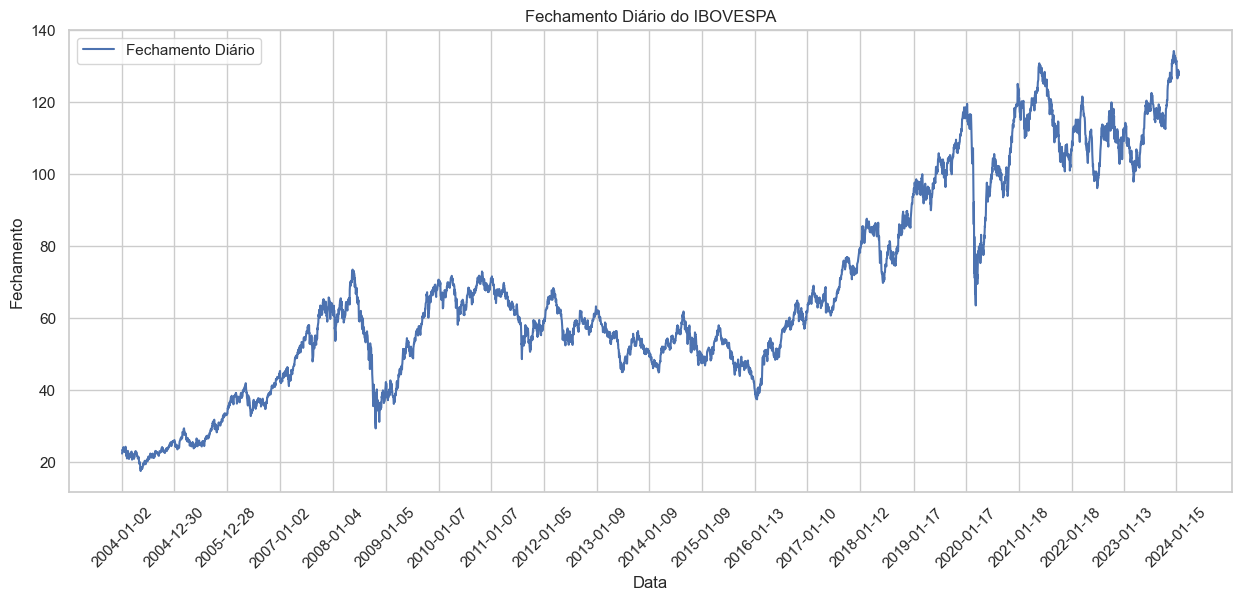

In [84]:
plt.figure(figsize=(15, 6))
plt.plot(dados.index, dados['Último'], label='Fechamento Diário')
plt.title('Fechamento Diário do IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')

n_labels = 20  
labels = dados.index[::len(dados) // n_labels]

plt.xticks(labels, rotation=45)

plt.legend()
plt.show()

### Conclusões:
Crescimento e Alta Volatilidade: O gráfico mostra um crescimento significativo na Ibovespa entre 2004 e 2008, seguido por uma volatilidade considerável e oscilações acentuadas entre 2009 e 2016. Esses períodos indicam uma alta volatilidade e eventos de mercado que causaram variações significativas nos valores.

Recuperação e Novos Picos: Após uma recuperação em 2009, a Ibovespa atingiu novos picos entre 2017 e 2019, antes de enfrentar uma queda abrupta no final de 2019 e início de 2020. Isso sugere que, após períodos de alta, o mercado pode enfrentar correções significativas.

Tendência Recente: Desde 2021, a Ibovespa tem apresentado uma tendência de alta, com valores oscilando entre 100 e 130 USD. Essa faixa sugere um mercado mais estável em comparação com os anos anteriores, embora ainda possa haver volatilidade e variações.

Anomalias e Outliers: O pico de 2008 e a queda abrupta no início de 2020 são pontos de interesse, pois indicam eventos extraordinários que merecem uma investigação mais detalhada para entender os fatores subjacentes que causaram essas anomalias.

### Gráfico Boxplot para Detectar Outliers:

In [85]:
import seaborn as sns


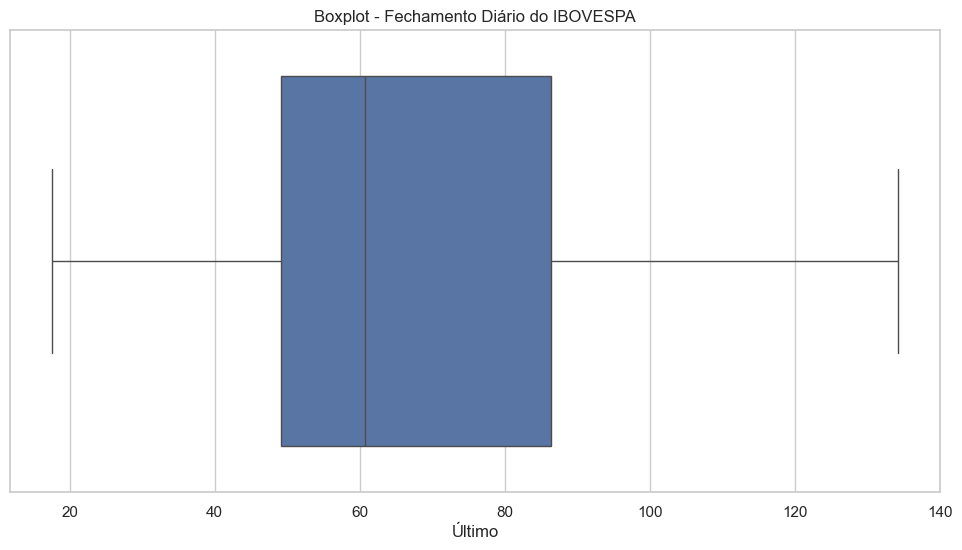

In [86]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(x=dados['Último'], data=dados)
axes.set_title('Boxplot - Fechamento Diário do IBOVESPA')
plt.show()


### Violin Plot para observar a distribuição dos dados:

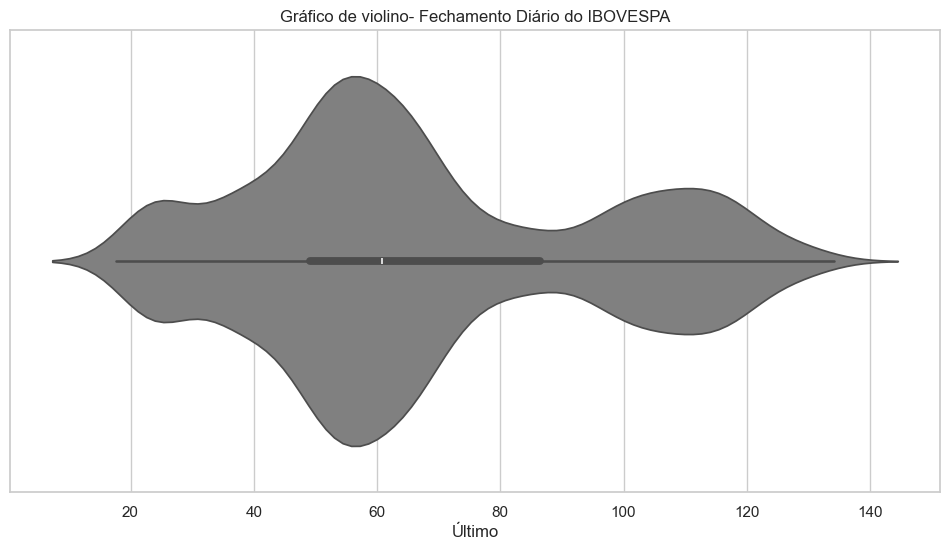

In [87]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x=dados['Último'], data=dados, color='gray')
axes.set_title('Gráfico de violino- Fechamento Diário do IBOVESPA')
plt.show()


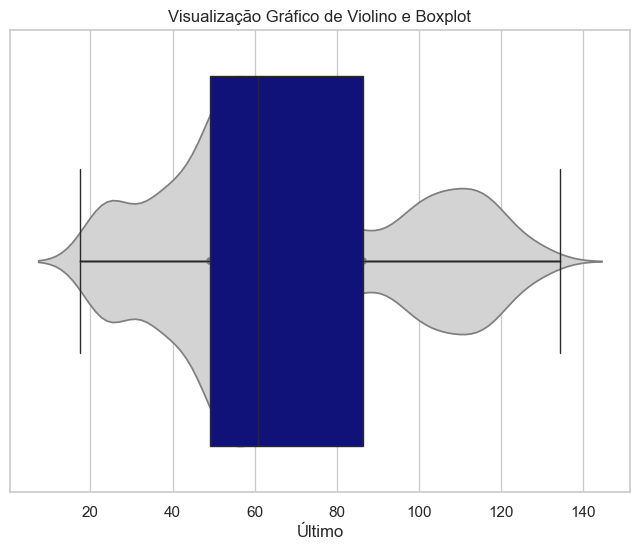

In [88]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x=dados['Último'], data=dados, ax=ax, color='lightgray')
sns.boxplot(x=dados['Último'], data=dados, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Gráfico de Violino e Boxplot')

plt.show()


### Heatmap de Correlações:

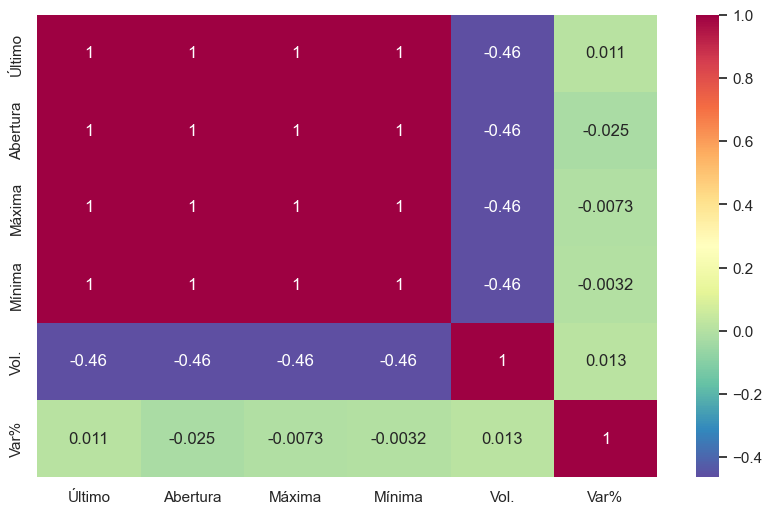

In [89]:
numeric_dados = dados.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_dados.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
corr = sns.heatmap(correlation_matrix, annot=True, cmap="Spectral_r")
plt.show()


## Análise Temporal

### Decomposição da Série Temporal:

In [90]:
dados.head()


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2004-01-02,22.445,22.233,22.450,22.208,136420000.0,0.94
2004-01-05,23.532,22.445,23.532,22.445,496710000.0,4.84
2004-01-06,23.576,23.532,23.976,23.180,472380000.0,0.19
2004-01-07,23.320,23.576,23.899,23.320,464080000.0,-1.09
2004-01-08,23.717,23.334,23.718,23.122,436740000.0,1.70


In [91]:
# Agrupa os dados por ano e contar o número de entradas.
dados['Data'] = pd.to_datetime(dados.index, format='%d.%m.%Y', dayfirst=True)
dados['anual_dias'] = dados['Data'].dt.year

days_per_year = dados.groupby('anual_dias').size()

print(sum(days_per_year)/20)


248.7


In [92]:
# pip install statsmodels


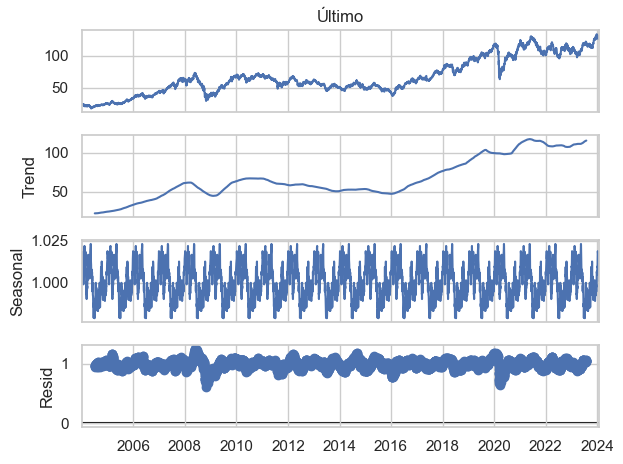

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dados['Último'], model='multiplicative', period=248) # Assumindo um ano de 248 dias úteis
result.plot()
plt.show()


### Autocorrelação e Autocorrelação Parcial

<Figure size 1400x700 with 0 Axes>

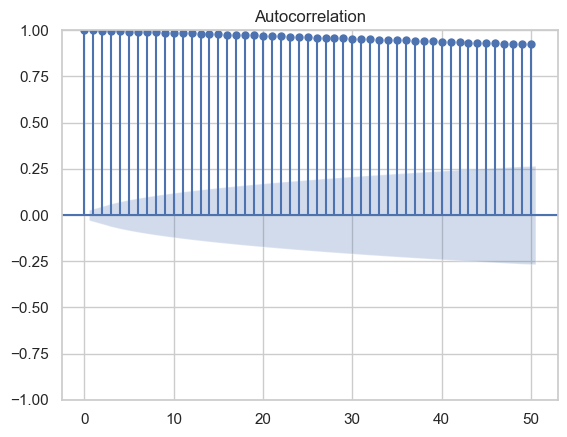

<Figure size 1400x700 with 0 Axes>

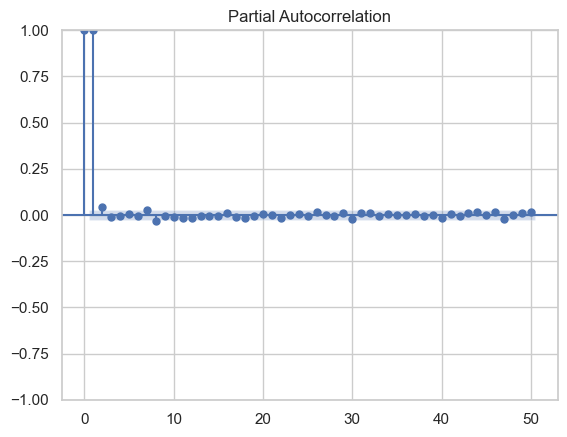

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# gráficos de autocorrelação e autocorrelação parcial para entender as dependências temporais nos dados.
plt.figure(figsize=(14, 7))
plot_acf(dados['Último'], lags=50)
plt.show()

plt.figure(figsize=(14, 7))
plot_pacf(dados['Último'], lags=50)
plt.show()


## Feature Engineering (Normalização e Padronização)

### Extração de Componentes de Data: 

In [95]:
dados['Data'] = pd.to_datetime(dados.index, format='%d.%m.%Y', dayfirst=True)
dados['Dia'] = dados['Data'].dt.day
dados['Mês'] = dados['Data'].dt.month
dados['Ano'] = dados['Data'].dt.year
dados['Trimestre'] = dados['Data'].dt.quarter
dados['Dia_da_Semana'] = dados['Data'].dt.dayofweek
dados['Fim_de_Semana'] = dados['Dia_da_Semana'].apply(lambda x: 1 if x >= 5 else 0)


In [96]:
# Criação de lags: Lags são valores defasados de uma série temporal, ou seja, os valores anteriores a um ponto no tempo. Eles são usados para capturar dependências temporais nos dados. 
# Na modelagem de séries temporais, os lags ajudam a prever o valor atual com base nos valores passados. 

dados['Lag_1'] = dados['Último'].shift(1)  # shift() desloca a série temporal em n períodos, criando novas colunas.
dados['Lag_5'] = dados['Último'].shift(5)
dados['Lag_10'] = dados['Último'].shift(10)

# Criação de médias móveis

dados['MA_5'] = dados['Último'].rolling(window=5).mean()
dados['MA_10'] = dados['Último'].rolling(window=10).mean()
dados['MA_20'] = dados['Último'].rolling(window=20).mean()


In [97]:
# Média Móvel Exponencial
dados['EMA_10'] = dados['Último'].ewm(span=10, adjust=False).mean()
dados['EMA_20'] = dados['Último'].ewm(span=20, adjust=False).mean()


### Índice de Força Relativa (RSI):

* Análise atraves da RSI:
- O RSI frequentemente acima de 70 sugere que o ativo está em condição de sobrecompra. Isso pode indicar uma forte tendência de alta e pressão compradora significativa. Apesar da alta constante, é importante estar atento a possíveis correções ou consolidações, pois níveis elevados de RSI podem levar a ajustes de preço.

- O RSI frequentemente alto pode refletir um forte momentum positivo no ativo, indicando uma tendência robusta e uma força relativa significativa. Sugerindo que o ativo tem um desempenho superior em relação ao mercado ou aos seus pares.

- O ativo tem pouca oscilacao que atinge níveis abaixo de 30, indicando menos situações de sobrevenda e sugerindo resiliência durante as quedas. Sendo que tende a se recuperar rapidamente de quedas, mostrando uma menor pressão de venda.


In [98]:
def calcular_RSI(data, window):
    delta = data.diff(1) # diff(1): Calcula a diferença entre o preço atual e o preço anterior
    gain = delta.where(delta > 0, 0) # Mantém as diferenças positivas e define as negativas como 0.
    loss = -delta.where(delta < 0, 0) # Mantém as diferenças negativas (como valores positivos) e define as positivas como 0.
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean() # Calcula a média móvel dos ganhos e perdas.
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss # Relativa Força: ratio de ganho médio para perda média
    rsi = 100 - (100 / (1 + rs))
    return rsi

dados['RSI_14'] = calcular_RSI(dados['Último'], 14)


In [99]:
dados.head(3)


,Último,Abertura,Máxima,Mínima,Vol.,Var%,Data,anual_dias,Dia,Mês,...,Fim_de_Semana,Lag_1,Lag_5,Lag_10,MA_5,MA_10,MA_20,EMA_10,EMA_20,RSI_14
Data,,,,,,,,,,,,,,,,,,,,,
2004-01-02,22.445,22.233,22.450,22.208,136420000.0,0.94,2004-01-02,2004,2,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,22.445000,22.445000,NaN
2004-01-05,23.532,22.445,23.532,22.445,496710000.0,4.84,2004-01-05,2004,5,1,...,0,22.445,NaN,NaN,NaN,NaN,NaN,22.642636,22.548524,100.0
2004-01-06,23.576,23.532,23.976,23.180,472380000.0,0.19,2004-01-06,2004,6,1,...,0,23.532,NaN,NaN,NaN,NaN,NaN,22.812339,22.646379,100.0


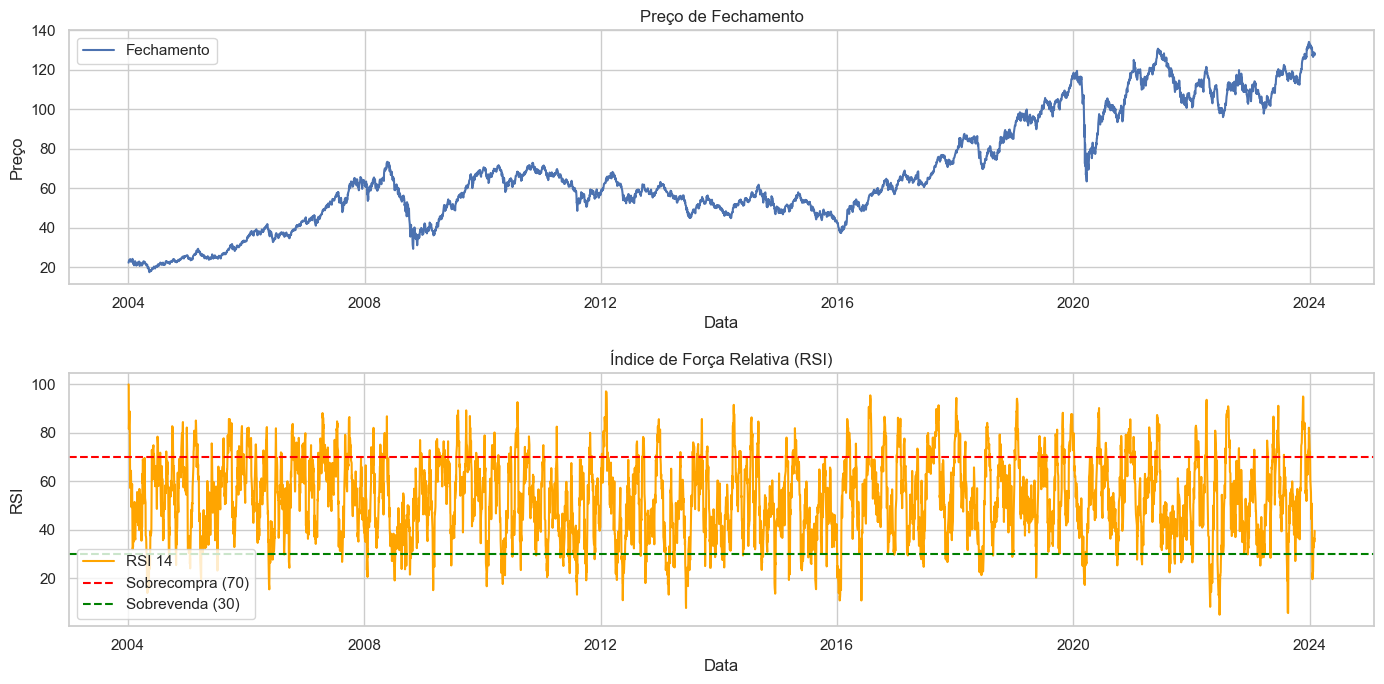

In [100]:
plt.figure(figsize=(14, 7))

# Preço de fechamento
plt.subplot(2, 1, 1)
plt.plot(dados['Último'], label='Fechamento')
plt.title('Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

# RSI
plt.subplot(2, 1, 2)
plt.plot(dados['RSI_14'], label='RSI 14', color='orange')
plt.axhline(y=70, color='red', linestyle='--', label='Sobrecompra (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Sobrevenda (30)')
plt.title('Índice de Força Relativa (RSI)')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()


Obs.: 
* Se o RSI está acima de 70, pode indicar que o ativo está sobrecomprado, sugerindo que o preço pode estar alto demais e pode ocorrer uma correção ou queda em breve.
* Se o RSI está abaixo de 30, pode indicar que o ativo está sobrevendido, sugerindo que o preço pode estar baixo demais e pode ocorrer uma recuperação ou aumento em breve.

### Bandas de Bollinger: 

As Bandas de Bollinger são um indicador de volatilidade que cria uma banda superior e uma inferior em torno de uma média móvel simples. Consistem em uma média móvel central (geralmente de 20 períodos) e duas bandas que são traçadas a um desvio padrão acima e abaixo da média móvel. Estas bandas se ajustam dinamicamente com a volatilidade do ativo.

https://algobulls.github.io/pyalgotrading/strategies/bollinger_bands/

In [101]:
def calcular_bollinger_bands(data, window):
    MA = data.rolling(window=window).mean() # Calcula a média móvel simples.
    std = data.rolling(window=window).std() # Calcula o desvio padrão móvel
    upper_band = MA + (std * 2)
    lower_band = MA - (std * 2)
    return upper_band, lower_band

dados['Upper_BB'], dados['Lower_BB'] = calcular_bollinger_bands(dados['Último'], 20)


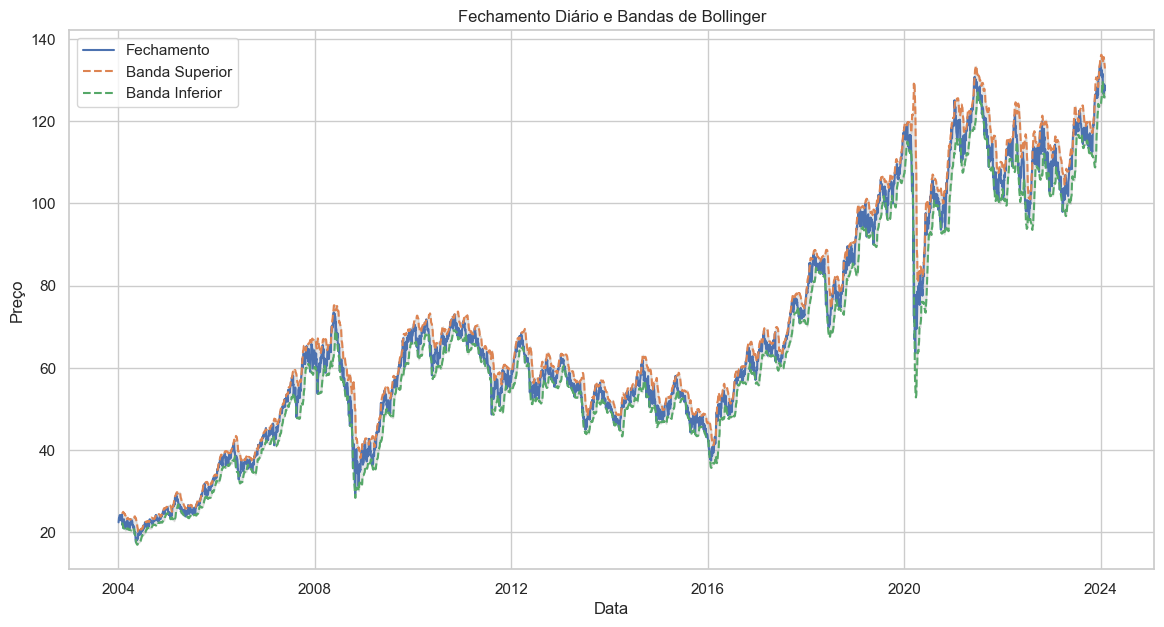

In [102]:

plt.figure(figsize=(14, 7))
plt.plot(dados['Último'], label='Fechamento')
plt.plot(dados['Upper_BB'], label='Banda Superior', linestyle='--')
plt.plot(dados['Lower_BB'], label='Banda Inferior', linestyle='--')
plt.fill_between(dados.index, dados['Upper_BB'], dados['Lower_BB'], color='gray', alpha=0.2)
plt.title('Fechamento Diário e Bandas de Bollinger')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

# As Bandas de Bollinger fornecem uma faixa de preço dentro da qual o ativo geralmente oscila, ajudando a identificar pontos de sobrecompra e sobrevenda. 
# Quando o preço se aproxima ou ultrapassa as bandas, pode sinalizar uma possível reversão ou continuação da tendência.


### Análise das Bandas de Bollinger para a Ibovespa
* Queda Abrupta em 2008, a Ibovespa enfrentou uma queda abrupta. Ao analisar as Bandas de Bollinger durante este período, observamos que o preço se manteve próximo à banda inferior. Este comportamento sugere uma tendência de baixa contínua, como indicado pela proximidade com a banda inferior. A banda inferior atuou como uma referência para a pressão de venda intensa e a falta de suporte para o preço. A largura das bandas também pode ter se expandido, refletindo a alta volatilidade do mercado durante essa queda.

* Após a queda de 2008, a Ibovespa experimentou uma recuperação significativa em 2009. Durante este período, o preço se manteve próximo à banda superior por um período prolongado.A proximidade com a banda superior durante a recuperação indica uma forte tendência de alta e a continuidade dessa tendência. O ativo demonstrou uma pressão compradora significativa e uma valorização acentuada. A banda superior atuou como um nível de resistência durante a alta, e sua manutenção sugere a robustez da tendência de alta.

* Queda de 2019, a Ibovespa passou por uma queda semelhante à observada em 2008. Neste período, o comportamento das Bandas de Bollinger apresentou uma dinâmica similar. A queda de 2019 também foi caracterizada por uma aproximação do preço à banda inferior, indicando uma pressão de venda intensa e uma tendência de baixa. A largura das bandas pode ter se expandido, refletindo a alta volatilidade do mercado durante essa queda. Esta similaridade na dinâmica das bandas entre 2008 e 2019 sugere um padrão de comportamento recorrente em períodos de crise ou correção do mercado.

* Conclusão
A análise das Bandas de Bollinger revela padrões importantes no comportamento da Ibovespa. Em 2008 e 2019, a proximidade com a banda inferior destacou tendências de baixa, enquanto a recuperação de 2009 e 2020 evidenciou uma forte tendência de alta com o preço próximo à banda superior. 

### Volume e Volatilidade: 

O volume de negociações e a volatilidade são características importantes para entender a dinâmica do mercado. Eles ajudam a medir a atividade do mercado e a instabilidade dos preços, respectivamente.

In [103]:
dados['Var%'] = dados['Último'].pct_change() * 100 # Calcula a mudança percentual entre o preço atual e o preço anterior.

# A variação percentual diária mostra a mudança percentual no preço de fechamento de um dia para o próximo. É útil para medir a amplitude das mudanças diárias.


In [104]:
dados['Volatilidade_10'] = dados['Var%'].rolling(window=10).std() # Calcula o desvio padrão móvel para os últimos 10 dias, representando a volatilidade.
dados['Volatilidade_20'] = dados['Var%'].rolling(window=20).std()

# A volatilidade mede a variação do preço de um ativo ao longo do tempo. Ela indica o quão estável ou instável é o preço do ativo. Altos valores de volatilidade significam grandes 
# flutuações no preço, enquanto baixos valores indicam flutuações menores.


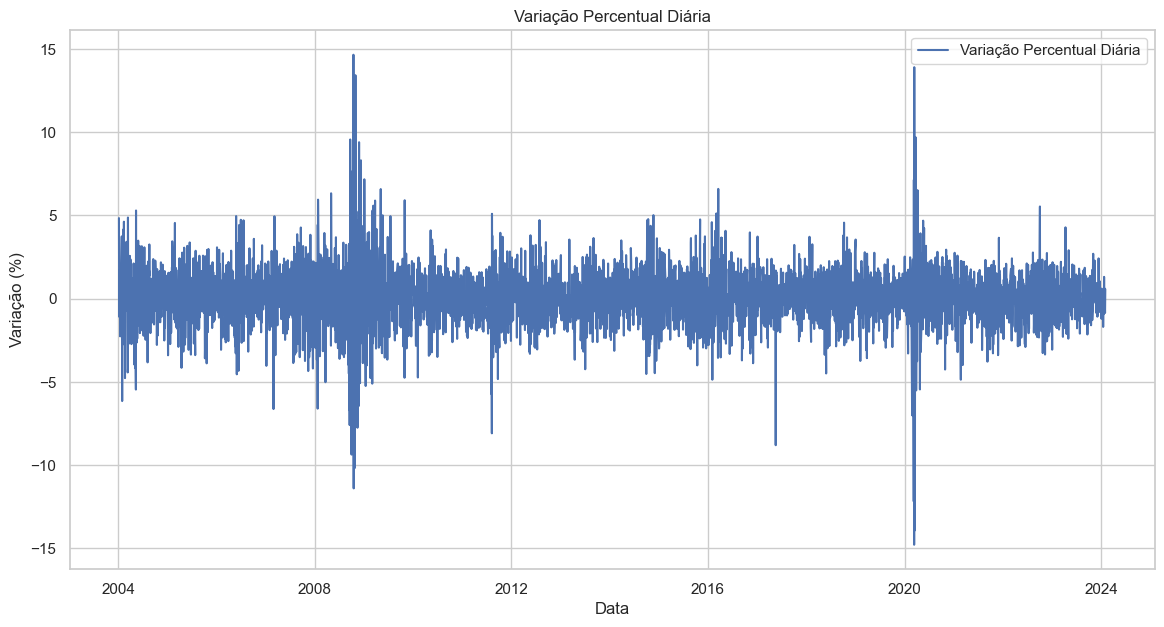

In [105]:
plt.figure(figsize=(14, 7))
plt.plot(dados['Var%'], label='Variação Percentual Diária')
plt.title('Variação Percentual Diária')
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.legend()
plt.show()


### Conclusão
O gráfico da Ibovespa demonstra padrões claros de alta volatilidade e oscilações constantes, com quedas abruptas em 2008 e 2019 seguidas de altas percentuais significativas em 2009 e 2020. A análise do volume e da volatilidade durante esses períodos revela a intensidade das reações do mercado e a resiliência diante de crises econômicas. Esses insights são cruciais para entender a dinâmica do mercado e para a formulação de estratégias de negociação que considerem a volatilidade e os padrões de volume em resposta a eventos significativos.

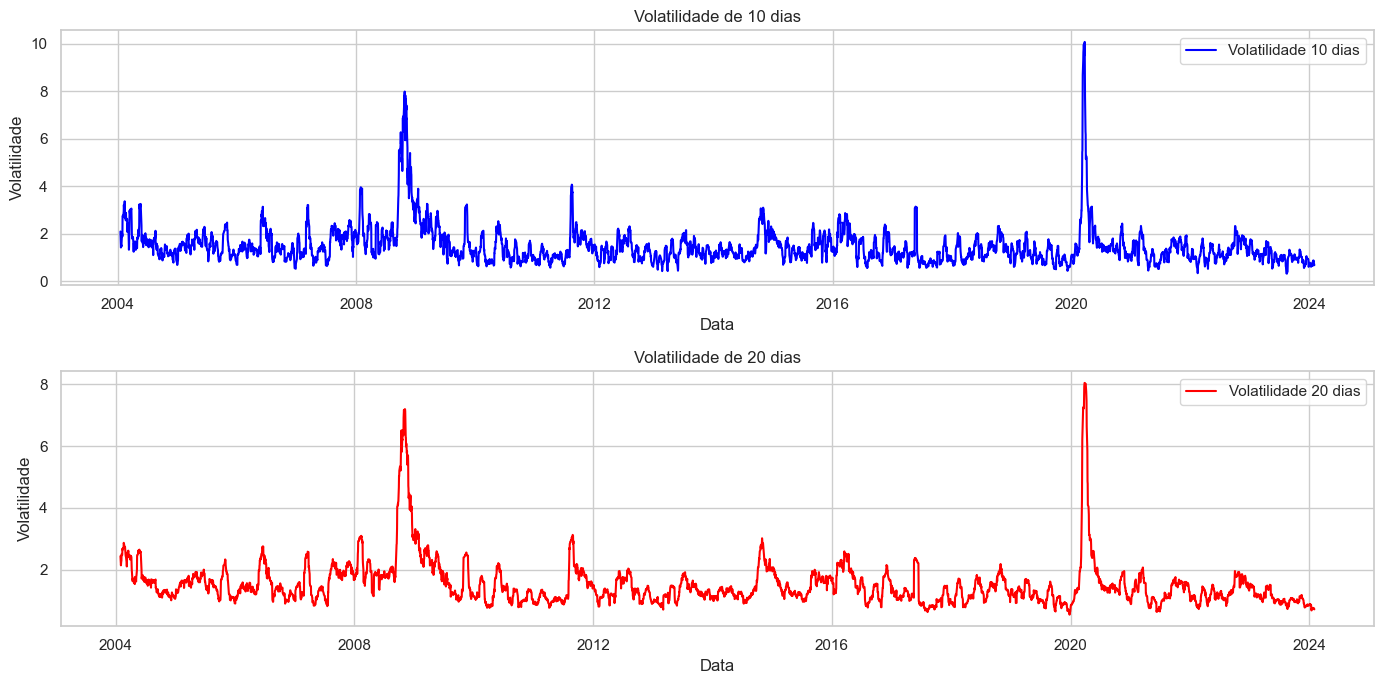

In [106]:
plt.figure(figsize=(14, 7))

# Volatilidade de 10 dias
plt.subplot(2, 1, 1)
plt.plot(dados['Volatilidade_10'], label='Volatilidade 10 dias', color='blue')
plt.title('Volatilidade de 10 dias')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

# Volatilidade de 20 dias
plt.subplot(2, 1, 2)
plt.plot(dados['Volatilidade_20'], label='Volatilidade 20 dias', color='red')
plt.title('Volatilidade de 20 dias')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

plt.tight_layout()
plt.show()


### Conclusão
Os gráficos mostram padrões semelhantes (mesmos picos e vales) apesar de terem níveis diferentes de volatilidade, isso pode indicar que o comportamento do mercado é consistente ao longo dos diferentes períodos analisados. A semelhança sugere que tanto a volatilidade de curto prazo (10 dias) quanto a de médio prazo (20 dias) estão respondendo de maneira similar a eventos de mercado.

In [107]:
dados = dados.dropna()


In [108]:
print(dados.head())


            Último  Abertura  Máxima  Mínima         Vol.      Var%  \
Data                                                                  
2004-01-30  21.851    22.384  22.615  21.649  430570000.0 -2.389887   
2004-02-02  21.787    21.842  21.867  21.336  327360000.0 -0.292893   
2004-02-03  22.281    21.794  22.287  21.794  302440000.0  2.267407   
2004-02-04  21.685    22.289  22.718  21.555  464940000.0 -2.674925   
2004-02-05  21.092    21.685  21.909  21.077  414970000.0 -2.734609   

                 Data  anual_dias  Dia  Mês  ...     MA_5    MA_10     MA_20  \
Data                                         ...                               
2004-01-30 2004-01-30        2004   30    1  ...  23.3330  23.3471  23.46130   
2004-02-02 2004-02-02        2004    2    2  ...  22.8204  23.1873  23.37405   
2004-02-03 2004-02-03        2004    3    2  ...  22.4314  23.0475  23.30930   
2004-02-04 2004-02-04        2004    4    2  ...  21.9980  22.8858  23.22755   
2004-02-05 2004-02-05 

# Treinamento dos Modelos:

## Regressão Linear

In [109]:
features = ['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Dia', 'Mês', 'Ano', 'Trimestre', 'Dia_da_Semana', 
            'Fim_de_Semana', 'Lag_1', 'Lag_5', 'Lag_10', 'MA_5', 'MA_10', 'MA_20', 'EMA_10', 'EMA_20', 
            'RSI_14', 'Upper_BB', 'Lower_BB', 'Var%', 'Volatilidade_10', 'Volatilidade_20']
target = 'Último'

X = dados[features]
y = dados[target]


In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [111]:
from sklearn.linear_model import LinearRegression


In [112]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [113]:
predicoes = modelo.predict(X_test)


In [114]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicoes)
print(f"Erro Quadrático Médio (MSE): {mse}")


Erro Quadrático Médio (MSE): 0.2029881428799871


In [115]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predicoes)
print(f"Coeficiente de Determinação (R²): {r2}")


Coeficiente de Determinação (R²): 0.9985532311737892


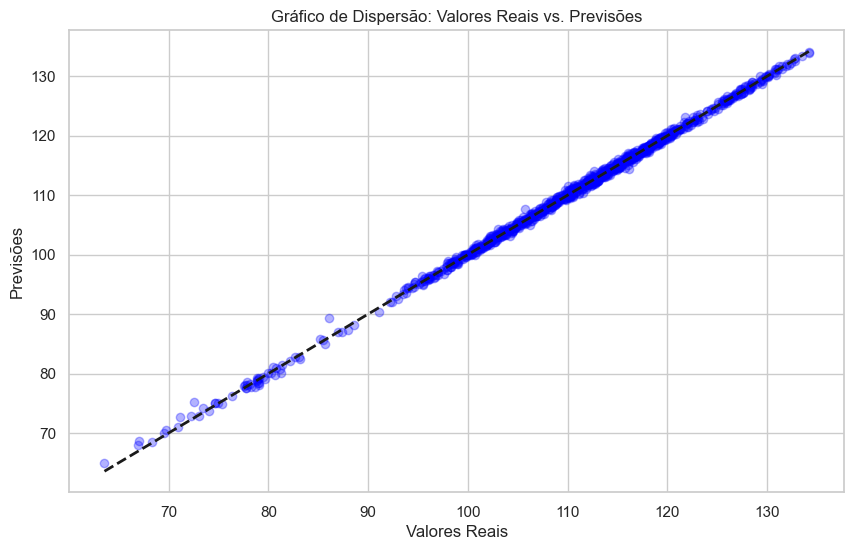

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicoes, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões')
plt.show()


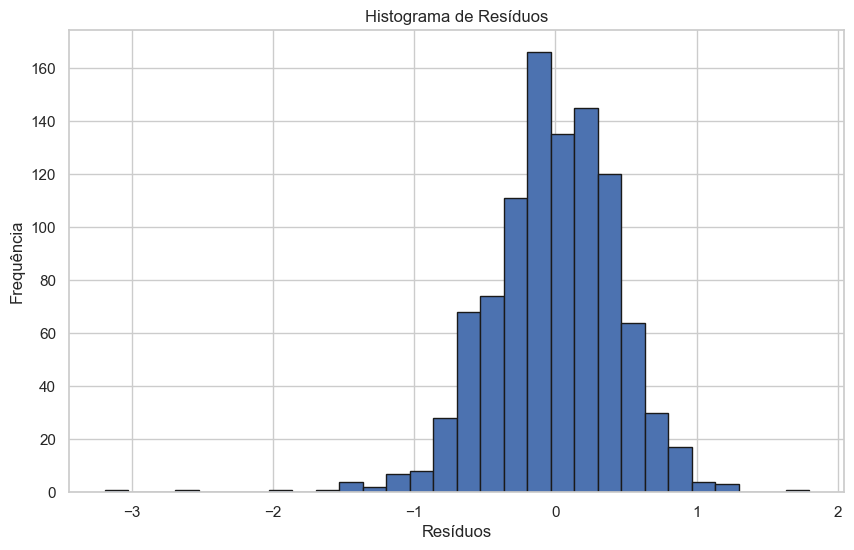

In [117]:
residuos = y_test - predicoes

plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.show()


## Conclusão Regressão Linear:

O modelo de regressão utilizado exibe um desempenho impressionante, com um Erro Quadrático Médio (MSE) de 0.2029881428799871, indicando que os erros das previsões são relativamente pequenos em média. Além disso, o Coeficiente de Determinação (R²) alcança 0.9985532311737892, o que é excepcionalmente alto. Isso sugere que o modelo explica aproximadamente 99.85% da variação nos dados de fechamento da IBOVESPA, indicando um ajuste muito próximo aos dados observados.

A distribuição dos resíduos está aproximadamente normal e centrada em torno de zero, o que é um bom sinal de que o modelo não apresenta viés sistemático e que a variabilidade não explicada é aleatória. Esse comportamento é consistente com as suposições da regressão e fortalece a confiabilidade das previsões do modelo.

No entanto, é importante notar que um valor de R² tão alto pode levantar questões sobre a robustez e a validade do modelo. Um R² próximo de 100% pode, às vezes, ser um sinal de sobreajuste (overfitting), especialmente se o modelo está ajustando perfeitamente aos dados de treinamento, mas pode não generalizar bem para dados não vistos.

Portanto, é aconselhável explorar e comparar outros modelos para validar e possivelmente melhorar a previsão. Modelos mais complexos, como regressões polinomiais, árvores de decisão, random forests, e redes neurais, podem oferecer diferentes perspectivas e potencialmente revelar nuances que o modelo de regressão linear pode ter deixado de capturar. Além disso, a aplicação de técnicas de validação cruzada e a análise de modelos de séries temporais especializadas podem ajudar a garantir que o modelo final seja robusto e capaz de generalizar para novos dados.

Em resumo, enquanto o modelo atual demonstra um ajuste muito bom aos dados históricos, a exploração de outras abordagens é essencial para confirmar a precisão das previsões e garantir a aplicabilidade do modelo em cenários futuros.

### Referências

- *Avaliar modelo de Regressão Linear*
https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96

## Regressões Polinominais

### Preparando os Dados

In [118]:
# Importando as bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [119]:
dados.columns


Index(['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%', 'Data',
       'anual_dias', 'Dia', 'Mês', 'Ano', 'Trimestre', 'Dia_da_Semana',
       'Fim_de_Semana', 'Lag_1', 'Lag_5', 'Lag_10', 'MA_5', 'MA_10', 'MA_20',
       'EMA_10', 'EMA_20', 'RSI_14', 'Upper_BB', 'Lower_BB', 'Volatilidade_10',
       'Volatilidade_20'],
      dtype='object')

In [120]:
# Separando as variáveis características e variável target

features = ['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Dia', 'Mês', 'Ano', 'Trimestre', 'Dia_da_Semana', 
            'Fim_de_Semana', 'Lag_1', 'Lag_5', 'Lag_10', 'MA_5', 'MA_10', 'MA_20', 'EMA_10', 'EMA_20', 
            'RSI_14', 'Var%']
target = 'Último'


In [121]:
X = dados[features]
y = dados[target]


In [122]:
# Dividindo os dados em Bases de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
# Imputando dados para preencher valores faltantes

from sklearn.impute import SimpleImputer


In [124]:
imputer = SimpleImputer(strategy='mean')  # Aqui também poderia ser utilizado mediana, maior frequência, etc.


In [125]:
# Ajustando o imputador aos dados de treino e transformá-los
X_train_imputed = imputer.fit_transform(X_train)


In [126]:
# Transformando os dados de teste
X_test_imputed = imputer.transform(X_test)


In [127]:
# Transformando as características para incluir termos polinomiais
degree = 2  # Grau do polinômio escolhido = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_imputed)
X_test_poly = poly.transform(X_test_imputed)


In [128]:
# Ajustando o modelo de regressão polinomial aos dados transformados
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [129]:
# Fazendo as previsões:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


### Avaliando o Modelo

In [130]:
# Avaliação do modelo
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


In [131]:
# Imprimindo o Resultado do Modelo
print(f'Train MSE: {train_mse}')
print(f'Train R²: {train_r2}')
print(f'Test MSE: {test_mse}')
print(f'Test R²: {test_r2}')


Train MSE: 0.008512100645965396
Train R²: 0.9999890991789512
Test MSE: 0.010955886723429729
Test R²: 0.9999870367773557


### Visualização do Resultado

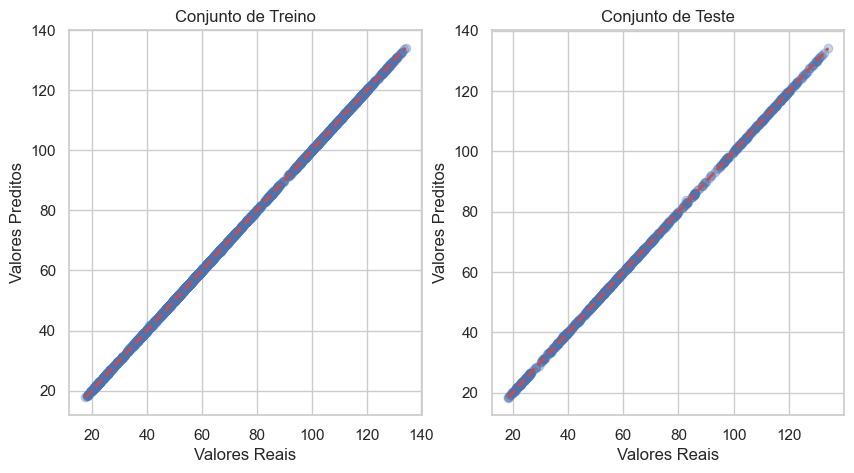

In [132]:
plt.figure(figsize=(10, 5))

# Plot dos dados de treino
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Conjunto de Treino')

# Plot dos dados de teste
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Conjunto de Teste')

plt.show()


## Conclusão Regressões Polinominais:

Um coeficiente de determinação R2 de 99% indica que o modelo está explicando 99% da variância nos dados de resposta, o que pode ser um sinal de que o modelo está ajustando muito bem aos dados de treinamento. No entanto, um R2 tão alto pode também ser um indicativo de que o modelo está superajustado / viciado (overfitting), especialmente se o conjunto de dados for pequeno ou se houver **muitas** características (features) em comparação ao número de observações.

## Avaliando a Confiabilidade do Modelo Regressões Polinominais:

### 1 - Comparando R2 de Treinamento e Teste

- Se os valores de R2 para o conjunto de treinamento e o conjunto de teste forem muito próximos, isso sugere que o modelo generaliza bem para dados não vistos.
- Se houver uma grande diferença entre os dois, isso indica que o modelo pode estar superajustado (**Overfitting**).

In [133]:
# Comparando os valores de R2 para ambos os conjuntos
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


Train R²: 0.9999890991789512
Test R²: 0.9999870367773557


### Conclusão:
- Se a diferença for pequena isso sugere que o modelo não está super ajustado
- Se a diferença for grande isso sugere que o modelo pode estar super ajustado = **Overfiting**

**Concluímos que este modelo está performando bem, pois os valores de R2 para Treino e Teste estão muito próximos.**

### 2 - Validação Cruzada 

- A validação cruzada ajuda a verificar a robustez do modelo ao testar seu desempenho em diferentes subconjuntos dos dados.  



In [134]:
# Utilizando a validação cruzada com o cross_val_score do sklearn
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² scores: {scores}')
print(f'Mean R²: {scores.mean()}')


Cross-Validation R² scores: [0.99997321 0.99999749 0.99998771 0.99998687 0.99998893]
Mean R²: 0.9999868405655332


### Conclusão:

- A média dos scores R2 da validação cruzada e a sua variabilidade são importantes. Scores consistentemente altos sugerem que o modelo generaliza bem.
- Scores variáveis ou significativamente mais baixos que o R2 de treinamento indicam que o modelo pode não ser robusto.

**Conclui-se que devido ao valor da Média de R2 ser consistentemente altos, este modelo nos mostra que a generalização performa bem.**

### 3- Verificação de Multicolinearidade

A multicolinearidade ocorre quando duas ou mais variáveis independentes em um modelo de regressão estão altamente correlacionadas entre si. Isso significa que uma variável pode ser predita linearmente a partir das outras com um grau significativo de precisão.

Detecção da Multicolinearidade

Verificando as correlações entre as variáveis independentes.  

Correlações altas (próximas de 1 ou -1) indicam multicolinearidade

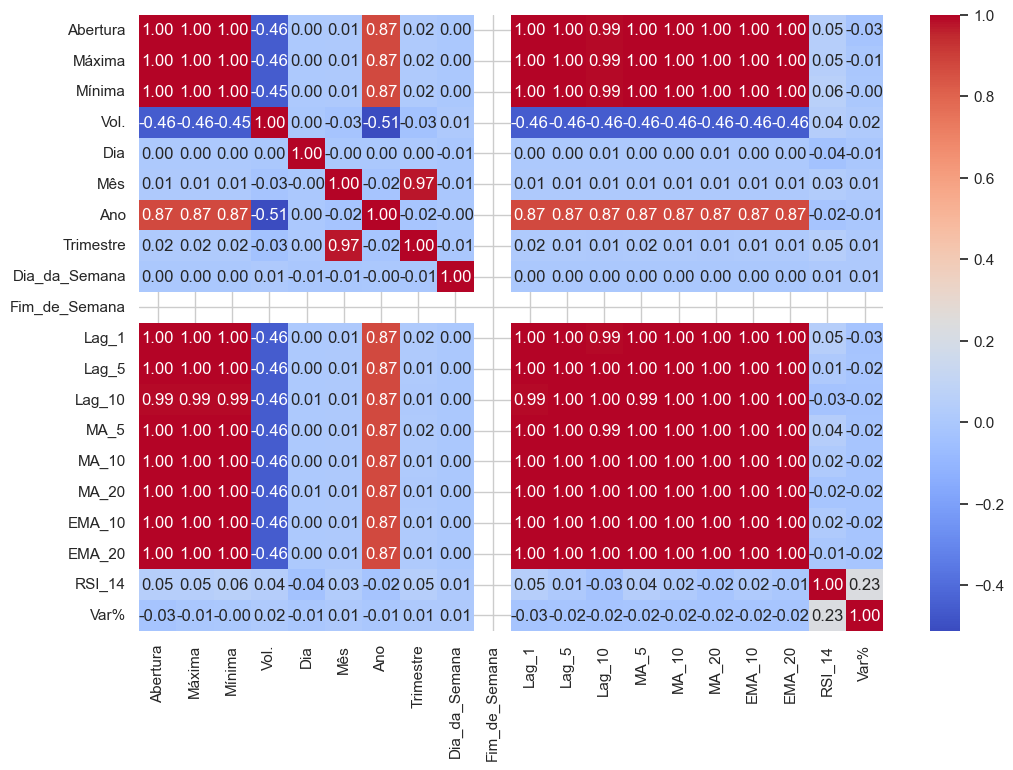

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


**Conclusão:**

- Se houver fortes correlações entre as variáveis polinomiais, isso pode indicar multicolinearidade.

**Ao verificar o gráfico acima, identificamos que muitas variáveis estão fortemente relacionadas, nos levando a crer que o Modelo permanece confiável**

## Conclusão Final referente ao Modelo de Regressões Polinominais

Após toda a análise da validação de confiabilidade do Modelo denominado Regressões Polinominais, os resultados se mostraram favoráveis, nos levando a  
acreditar que este tipo de Modelo está amplamente apto para consideramos em nossas análises de previsões.

### Referências

- *Edisciplinas USP*
https://edisciplinas.usp.br/pluginfile.php/8083873/mod_resource/content/1/Regressao%20Polinomial.pdf  

- *Machine Learning for Begnners / Microsoft*
https://learn.microsoft.com/pt-br/shows/machine-learning-for-beginners/improving-pumpkin-price-predictions-with-linear-and-polynomial-regression-using-scikit-learn-machine-learning-for-beginners#time=03m23s


## ARVORE DE DECISÃO (DecisionTreeRegressor)

Modelo de Arvore de Decisão: Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.

Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

 #Instanciando meu modelo
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)

  # Criando o modelo de DecisionTreeRegressor
model_dtr.fit(x_train, y_train)

 #previsão usando um modelo de árvore de decisão
y_pred_model_dtr = model_dtr.predict(x_test)

#Avaliando o Modelo 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
print(f"Mean Absolute Error: ",MAE)

 # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
MSE = mean_squared_error(y_test, y_pred_model_dtr)
print(f"Mean Squared Error: ",MSE)

 # (R-quadrado)
r2 = r2_score(y_test, y_pred_model_dtr)
print(f"Coeficiente de Determinação (R²): {r2}")

NameError: name 'x_train' is not defined

No modelo de arvore de decisão (DecisionTreeClassifier) maior performance foi o R2 com 87% de prescisão.

### Visão Grafica dos modelos

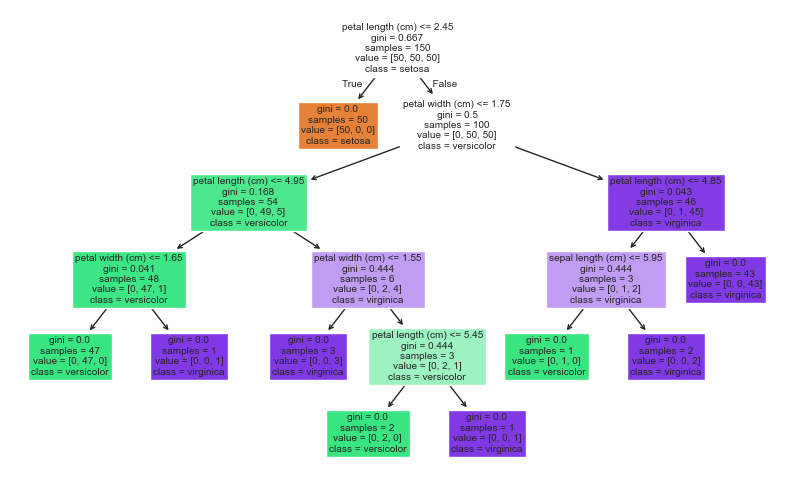

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# Importe o dataset (exemplo com Iris dataset)
data = load_iris()
x, y = data.data, data.target

# Crie o modelo de árvore de decisão
model = DecisionTreeClassifier()
model.fit(x, y)

# Visualize a árvore de decisão
plt.figure(figsize=(10, 6))
tree.plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

# Não consegui ter uma interpretação do grafico de arvore de decisão.. preciso de ajuda.

### Comparação do modelo com os dados reais:

Neste gráfico estamos fazendo as comparações entre os dados reais vs dados previstos no Machine Learning

NameError: name 'y_pred_model_dtr' is not defined

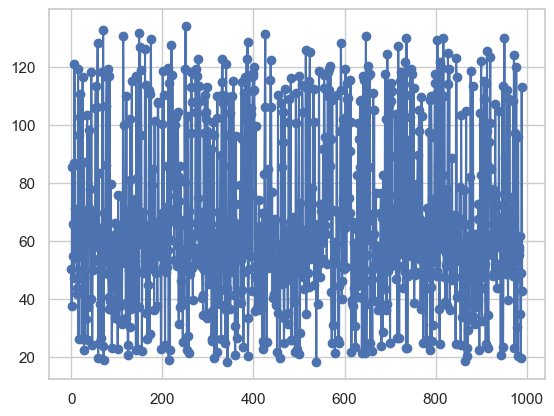

In [141]:
x_test = np.arange(len(y_test))  # Cria um vetor de índices para o eixo X
plt.plot(x_test, y_test, label='Valores reais', marker='o')
plt.plot(x_test, y_pred_model_dtr, label='Previsões', linestyle='--')

plt.xlabel('Amostras de teste')
plt.ylabel('Valores')
plt.title('Comparação entre valores reais e previsões (Árvore de Decisão)')
plt.legend()  # Adiciona a legenda com os rótulos

plt.show()

## Conclusão Arvore de Decisão:

No modelo de arvore de decisão (DecisionTreeClassifier) utilizamos 3 validações Mean Absolute Error, Mean Squared Error e R2 Score.
Após avaliar o resultado, identificamos que o modelo que mostrou maior performance foi o R2 com 87% de precisão.

Com base na comparação entre os valores reais e as previsões feitas pelo modelo de Árvore de Decisão, podemos tirar as seguintes conclusões:

**Desempenho do Modelo:** O modelo de Árvore de Decisão está tentando seguir a tendência dos valores reais, mas com algumas discrepâncias. A linha laranja (previsões) segue uma trajetória semelhante à linha azul (valores reais), mas com mais variabilidade.
O modelo parece ter dificuldade em prever com precisão os valores reais em alguns pontos.

**Variações e Erros:** Os picos e quedas na linha laranja indicam onde o modelo pode estar cometendo erros. Essas variações podem ser causadas por limitações do próprio algoritmo de Árvore de Decisão.

**Avaliação Adicional:** Em resumo, o modelo de Árvore de Decisão está fazendo previsões razoáveis, mas ainda há espaço para melhorias. Podemos perceber uma liniariedade entre 600 a 1000 o que mostra uma estabilidade.

## Arvore de Decisão (RandmForestClassifier)

O RandomForestClassifier é um classificador de floresta aleatória em Python. Ele faz parte da biblioteca scikit-learn e é usado para resolver problemas de classificação. Aqui estão os principais pontos sobre o RandomForestClassifier:

O que é uma Floresta Aleatória?
Uma floresta aleatória é um metaestimador que combina vários classificadores de árvore de decisão em subamostras diferentes do conjunto de dados.
Ela usa a média das previsões dessas árvores para melhorar a precisão preditiva e controlar o overfitting.

Como funciona:
Cada árvore na floresta é treinada em uma subamostra aleatória dos dados.
As árvores usam a melhor estratégia de divisão (equivalente a passar splitter="best" para o DecisionTreeRegressor subjacente).
A floresta combina as previsões de todas as árvores para obter uma previsão final.

Parâmetros importantes:
n_estimators: O número de árvores na floresta.
criterion: A função para medir a qualidade de uma divisão (por exemplo, “gini” ou “entropy”).
max_depth: A profundidade máxima da árvore.
E outros parâmetros relacionados à divisão e tamanho mínimo das amostras.

Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [143]:
# Crie o modelo de Random Forest
model_rfc = RandomForestClassifier()

# Treine o modelo
model_rfc.fit(x_train, y_train)

estimator = model_rfc.estimator_

# Faça previsões
y_pred = model_rfc.predict(x_test)

#metricas de precisão
print(accuracy_score(y_test, y_pred))

class_names = ["Verdadeiro", "Falso"]
label_names = ['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Dia', 'Mês', 'Ano', 'Trimestre', 'Dia_da_Semana', 
            'Fim_de_Semana', 'Lag_1', 'Lag_5', 'Lag_10', 'MA_5', 'MA_10', 'MA_20', 'EMA_10', 'EMA_20', 
            'RSI_14', 'Upper_BB', 'Lower_BB', 'Var%', 'Volatilidade_10', 'Volatilidade_20']

fig, axes = plt.subplots(nrows=1, ncds=1,figsize=(4,4),dpi=800)
tree.plot_tree(model_rfc.estimator_[0],
               feature_names=label_names,
               class_names=class_names,
               filled= True);

NameError: name 'x_train' is not defined

## Modelo ARIMA

In [ ]:
pip install statsmodels

In [144]:

dados.head(3)

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Data,anual_dias,Dia,Mês,...,MA_5,MA_10,MA_20,EMA_10,EMA_20,RSI_14,Upper_BB,Lower_BB,Volatilidade_10,Volatilidade_20
Data,,,,,,,,,,,,,,,,,,,,,
2004-01-30,21.851,22.384,22.615,21.649,430570000.0,-2.389887,2004-01-30,2004,30,1,...,23.3330,23.3471,23.46130,23.161031,23.209975,31.874810,24.682741,22.239859,2.771464,2.435740
2004-02-02,21.787,21.842,21.867,21.336,327360000.0,-0.292893,2004-02-02,2004,2,2,...,22.8204,23.1873,23.37405,22.911207,23.074454,33.044574,24.805475,21.942625,2.721646,2.139244
2004-02-03,22.281,21.794,22.287,21.794,302440000.0,2.267407,2004-02-03,2004,3,2,...,22.4314,23.0475,23.30930,22.796624,22.998887,41.129800,24.817367,21.801233,2.818224,2.216552


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dados['Último'], model='multiplicative', period=248) # Assumindo um ano de 248 dias úteis
result.plot()
plt.show()

* Analisando se a série é estacionária

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [ ]:
x = dados['Último'].values

H0 - Hipótese nula (não é estacionária) - valor p > 0.05 não podemos rejeitar a hipótese nula
H1 - Hipótese alternativa (rejeição da hipótese nula)

result = adfuller(x)

print('Teste ADF')
print(f'Teste estatístico: {result[0]}')
print(f'Valor p: {result[1]}')
print(f'Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Valor p > 0.05 portanto a série não é estacionária

Transformando a série em estacionária para aplicar o modelo ARIMA.

In [ ]:
ma = dados['Último'].rolling(12).mean()

fig, ax = plt.subplots(figsize=(20, 5))

dados['Último'].plot(ax=ax)
ma.plot(ax=ax)
plt.tight_layout()
plt.show()

* Aplicando escala logaritima

In [ ]:
dados_log = np.log(dados['Último'])
ma_log = dados_log.rolling(12).mean()

fig, ax = plt.subplots(figsize=(20, 5))
dados_log.plot(ax=ax)
ma_log.plot(ax=ax)
plt.tight_layout()
plt.show()

* removendo a média de tendencia

In [ ]:
dados_sub = (dados_log - ma_log).dropna()
ma_sub = dados_sub.rolling(12).mean()
std = dados_sub.rolling(12).std()

fig, ax = plt.subplots(figsize=(20, 5))
dados_sub.plot(ax=ax)
ma_sub.plot(ax=ax)
std.plot(ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
x_sub = dados_sub.values
result_sub = adfuller(x_sub)

print("Teste ADF")
print(f"Teste Estatístico: {result_sub[0]}")
print(f"P-Value: {result_sub[1]}")
print("Valores críticos:")

for key, value in result_sub[4].items():
  print(f"\t{key}: {value}")

Observa-se que a série passou a ser estacionária

Diferenciando os dados de um dia para o outro.

Sendo possível analisar quanto diminuiu ou cresceu de um dia para o outro

In [ ]:
dados_diff = dados_sub.diff(1)
ma_diff = dados_diff.rolling(12).mean()
std_diff = dados_diff.rolling(12).std()

fig, ax = plt.subplots(figsize=(20, 5))
dados_diff.plot(ax=ax)
ma_diff.plot(ax=ax)
std_diff.plot(ax=ax)
plt.tight_layout()
plt.show()

* Teste ADF do modelo diferenciando por um dia

In [ ]:
x_diff = dados_diff.dropna().values
result_diff = adfuller(x_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

A sério ficou mais próximo de estacionária

* Identificando os hiperparâmetros para o modelo ARIMA

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

# definindo o numero de lags
lag_acf = acf(dados_diff.dropna(), nlags=25)
lag_pacf = pacf(dados_diff.dropna(), nlags=25)

In [ ]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(dados_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(dados_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(dados_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(dados_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()

Parâmetros P, D e Q

P -> 1 - é quando a curva toca a linha 0 em ACF

D -> 1 - é a quantidade de vezes que a série foi diferenciada

Q -> 1 - é quando a curva toca a linha 0 em PACF